In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..
!python -m pip install -e .

/home/anna/hse/FewShotLearning
Obtaining file:///home/anna/hse/FewShotLearning
  Found existing installation: fewshot 0.0.1
    Uninstalling fewshot-0.0.1:
      Successfully uninstalled fewshot-0.0.1
  Running setup.py develop for fewshot


In [3]:
import fewshot

In [4]:
import os

dataset_root = 'fewshot/datasets'
dataset_name = 'mini_imagenet'
csv_name = 'data_84x84.csv'

dataset_dir = os.path.join(dataset_root, dataset_name)

Let's take a look at the data:

In [5]:
import pandas as pd

dataframe = pd.read_csv(os.path.join(dataset_dir, csv_name))
dataframe.head()

,filepath,class
0,images_84x84/n0153282900000005.jpg,n01532829
1,images_84x84/n0153282900000006.jpg,n01532829
2,images_84x84/n0153282900000007.jpg,n01532829
3,images_84x84/n0153282900000010.jpg,n01532829
4,images_84x84/n0153282900000014.jpg,n01532829


In [6]:
classes = dataframe['class'].unique()
print(len(classes))
print(' | '.join(classes))

100
n01532829 | n01558993 | n01704323 | n01749939 | n01770081 | n01843383 | n01855672 | n01910747 | n01930112 | n01981276 | n02074367 | n02089867 | n02091244 | n02091831 | n02099601 | n02101006 | n02105505 | n02108089 | n02108551 | n02108915 | n02110063 | n02110341 | n02111277 | n02113712 | n02114548 | n02116738 | n02120079 | n02129165 | n02138441 | n02165456 | n02174001 | n02219486 | n02443484 | n02457408 | n02606052 | n02687172 | n02747177 | n02795169 | n02823428 | n02871525 | n02950826 | n02966193 | n02971356 | n02981792 | n03017168 | n03047690 | n03062245 | n03075370 | n03127925 | n03146219 | n03207743 | n03220513 | n03272010 | n03337140 | n03347037 | n03400231 | n03417042 | n03476684 | n03527444 | n03535780 | n03544143 | n03584254 | n03676483 | n03770439 | n03773504 | n03775546 | n03838899 | n03854065 | n03888605 | n03908618 | n03924679 | n03980874 | n03998194 | n04067472 | n04146614 | n04149813 | n04243546 | n04251144 | n04258138 | n04275548 | n04296562 | n04389033 | n04418357 | 

Visualization utils:

In [7]:
import matplotlib.pyplot as plt

def plot_batch(x, y, info=None):
    batch_size = len(x)
    annotations = []
    class_name = 'unknown'
    image_name = 'unknown'
    
    print('Batch specs: {} items, item size = {}, dtype = {}'.format(batch_size, x[0].shape, x[0].dtype))
    
    fig, ax = plt.subplots(ncols=batch_size, figsize=(6 * batch_size, 5))
    for index in range(batch_size):
        image = x[index].astype(int)
        if batch_size > 1:
            ax[index].imshow(image)
            ax[index].axis('off')
        else:
            ax.imshow(image)
            ax.axis('off')
            
        if info is not None:
            dataframe_index, class_name, image_name = info[index]
        
        annotation = r'#{} (sample №{}): IMG [{}] CLASS [{}]'.format(index, dataframe_index, image_name, class_name)
        annotations.append(annotation)
        
    print('\n'.join(annotations))
    plt.show()

## Dataset

Initialize common class for both of the operating modes -- batch and few-shot:

In [8]:
from fewshot.data_provider import Dataset
dataset = Dataset(dataset_dir=dataset_dir, csv_name=csv_name)

## Batch mode

In [9]:
train_dataset, test_dataset = dataset.split_by_objects()

Split by objects with train size = 0.5 (seed = 42)
Train data: 30000 samples
Test data:  30000 samples


/home/anna/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


You should pass float value from (0, 1) as test for size, and it will be interpreted as test ratio:

In [10]:
small_dataset, _ = dataset.split_by_objects(train_size=0.01)

Split by objects with train size = 0.01 (seed = 42)
Train data: 600 samples
Test data:  59400 samples


... or integer defining number of test objects:

In [11]:
train_dataset, test_dataset = small_dataset.split_by_classes(train_size=50)

Split by classes with train size = 50 (seed = 42)
Train classes: 50
Test classes: 50
Train data: 300 samples
Test data:  300 samples


Alternatively, you can pass train and test classes directly:

In [12]:
train_classes, test_classes = classes[:10], classes[10:]
train_dataset, test_dataset = dataset.split_by_classes(train_classes=train_classes, test_classes=test_classes)

Train classes: 10
Test classes: 90
Train data: 6000 samples
Test data:  54000 samples


Passing number of test objects directly is not supported, as at learning representations stage all classes should be present in both train and test split, so train / test split must act like stratified split.

You can also get other split by setting random seed:

In [13]:
train_dataset, test_dataset = small_dataset.split_by_classes(random_state=10)

Split by classes with train size = 0.5 (seed = 10)
Train classes: 50
Test classes: 50
Train data: 300 samples
Test data:  300 samples


In [14]:
def plot_multiple_batches(generator, num_batches=1):
    for batch_index in range(num_batches):
        print('Batch {}:'.format(batch_index + 1)) 
        plot_batch(*(next(generator)))
        
        
def visualize_augmentation(**generator_args):
    print('Augmentation params: {}'.format(generator_args).upper())
    batch_generator = train_dataset.get_batch_generator(batch_size=4,
                                                        generator_args=generator_args,
                                                        shuffle=True,
                                                        return_info=True)
    plot_multiple_batches(batch_generator)

AUGMENTATION PARAMS: {}
Batch 1:
Batch specs: 4 items, item size = (84, 84, 3), dtype = float32
#0 (sample №19902): IMG [images_84x84/n0245740800000224.jpg] CLASS [n02457408]
#1 (sample №55906): IMG [images_84x84/n0761348000000225.jpg] CLASS [n07613480]
#2 (sample №7906): IMG [images_84x84/n0209183100000249.jpg] CLASS [n02091831]
#3 (sample №58470): IMG [images_84x84/n0925647900000609.jpg] CLASS [n09256479]


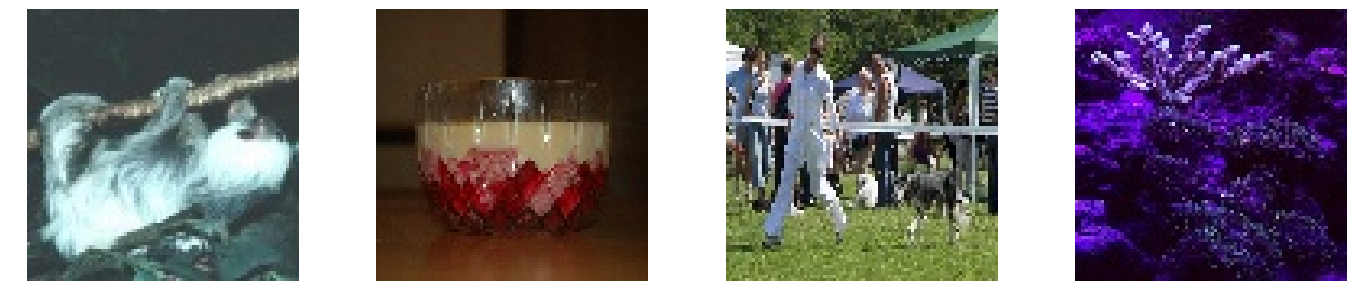

In [15]:
visualize_augmentation() # no augmentations are applied

### Random crop

AUGMENTATION PARAMS: {'CROP_SIZE': 64}
Batch 1:
Batch specs: 4 items, item size = (64, 64, 3), dtype = float32
#0 (sample №19902): IMG [images_84x84/n0245740800000224.jpg] CLASS [n02457408]
#1 (sample №55906): IMG [images_84x84/n0761348000000225.jpg] CLASS [n07613480]
#2 (sample №7906): IMG [images_84x84/n0209183100000249.jpg] CLASS [n02091831]
#3 (sample №58470): IMG [images_84x84/n0925647900000609.jpg] CLASS [n09256479]


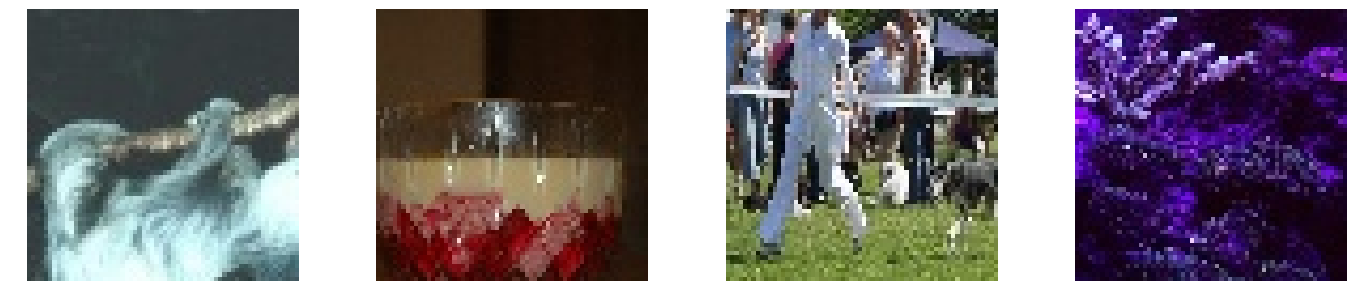

AUGMENTATION PARAMS: {'CROP_SIZE': 64, 'CENTER': TRUE}
Batch 1:
Batch specs: 4 items, item size = (64, 64, 3), dtype = float32
#0 (sample №19902): IMG [images_84x84/n0245740800000224.jpg] CLASS [n02457408]
#1 (sample №55906): IMG [images_84x84/n0761348000000225.jpg] CLASS [n07613480]
#2 (sample №7906): IMG [images_84x84/n0209183100000249.jpg] CLASS [n02091831]
#3 (sample №58470): IMG [images_84x84/n0925647900000609.jpg] CLASS [n09256479]


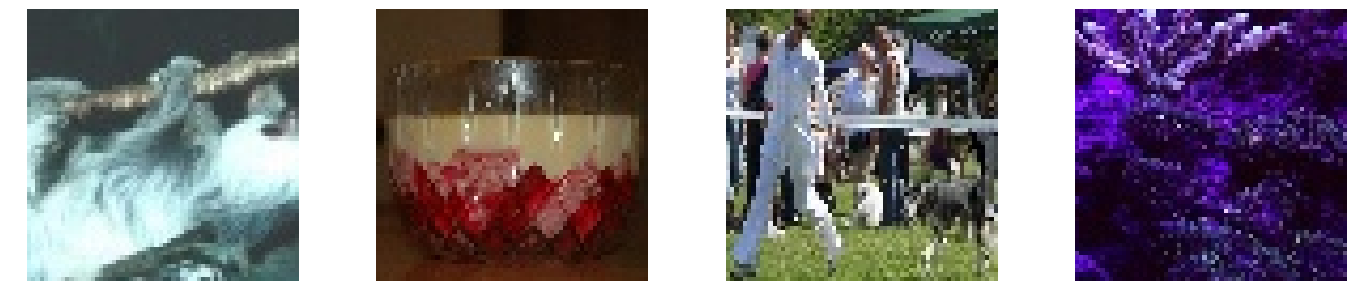

In [16]:
visualize_augmentation(crop_size=64)
visualize_augmentation(crop_size=64, center=True)

### Random color jitter 

AUGMENTATION PARAMS: {'COLOR_JITTER_PROB': 1.0, 'HUE_RANGE': (0.5, 1.5)}
Batch 1:
Batch specs: 4 items, item size = (84, 84, 3), dtype = float32
#0 (sample №19902): IMG [images_84x84/n0245740800000224.jpg] CLASS [n02457408]
#1 (sample №55906): IMG [images_84x84/n0761348000000225.jpg] CLASS [n07613480]
#2 (sample №7906): IMG [images_84x84/n0209183100000249.jpg] CLASS [n02091831]
#3 (sample №58470): IMG [images_84x84/n0925647900000609.jpg] CLASS [n09256479]


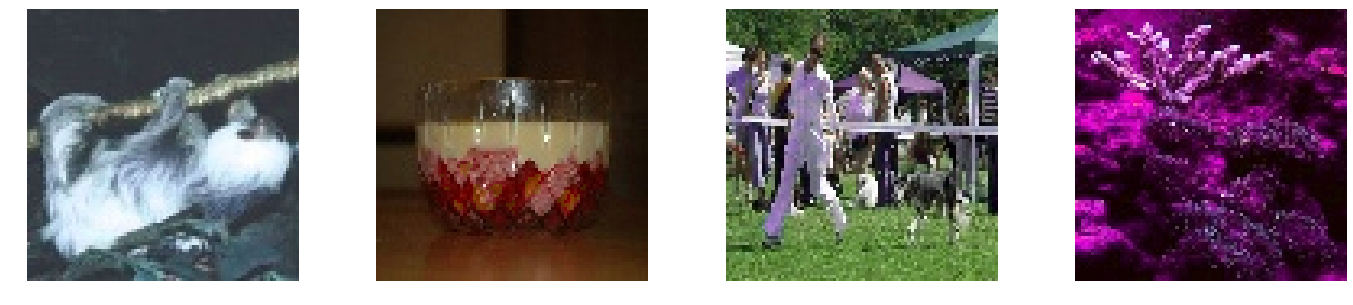

AUGMENTATION PARAMS: {'COLOR_JITTER_PROB': 1.0, 'SATURATION_RANGE': (0.5, 1.5)}
Batch 1:
Batch specs: 4 items, item size = (84, 84, 3), dtype = float32
#0 (sample №19902): IMG [images_84x84/n0245740800000224.jpg] CLASS [n02457408]
#1 (sample №55906): IMG [images_84x84/n0761348000000225.jpg] CLASS [n07613480]
#2 (sample №7906): IMG [images_84x84/n0209183100000249.jpg] CLASS [n02091831]
#3 (sample №58470): IMG [images_84x84/n0925647900000609.jpg] CLASS [n09256479]


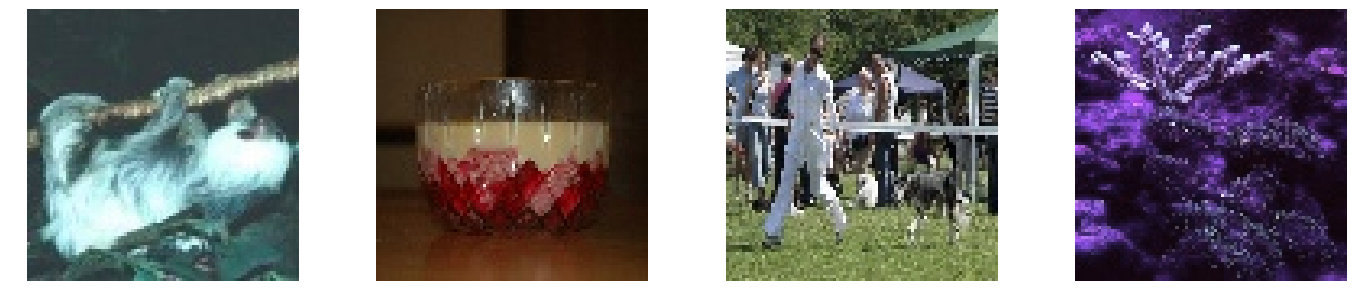

AUGMENTATION PARAMS: {'COLOR_JITTER_PROB': 1.0, 'VALUE_RANGE': (0.5, 1.5)}
Batch 1:
Batch specs: 4 items, item size = (84, 84, 3), dtype = float32
#0 (sample №19902): IMG [images_84x84/n0245740800000224.jpg] CLASS [n02457408]
#1 (sample №55906): IMG [images_84x84/n0761348000000225.jpg] CLASS [n07613480]
#2 (sample №7906): IMG [images_84x84/n0209183100000249.jpg] CLASS [n02091831]
#3 (sample №58470): IMG [images_84x84/n0925647900000609.jpg] CLASS [n09256479]


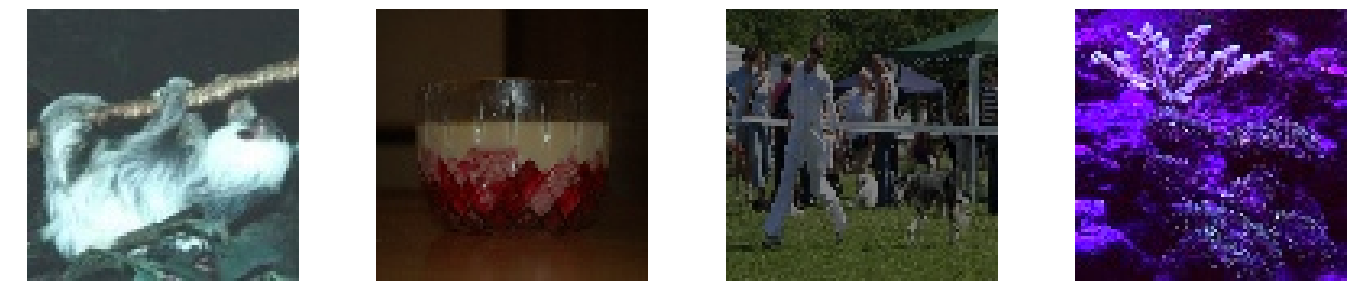

In [17]:
visualize_augmentation(color_jitter_prob=1.0, hue_range=(0.5, 1.5))
visualize_augmentation(color_jitter_prob=1.0, saturation_range=(0.5, 1.5))
visualize_augmentation(color_jitter_prob=1.0, value_range=(0.5, 1.5))

### Mix-ups

AUGMENTATION PARAMS: {'NUM_IMAGES_IN_MIXUP': 2, 'MIXUP_PROB': 1.0}
Batch 1:
Batch specs: 4 items, item size = (84, 84, 3), dtype = float32
#0 (sample №19902): IMG [images_84x84/n0245740800000224.jpg] CLASS [n02457408]
#1 (sample №55906): IMG [images_84x84/n0761348000000225.jpg] CLASS [n07613480]
#2 (sample №7906): IMG [images_84x84/n0209183100000249.jpg] CLASS [n02091831]
#3 (sample №58470): IMG [images_84x84/n0925647900000609.jpg] CLASS [n09256479]


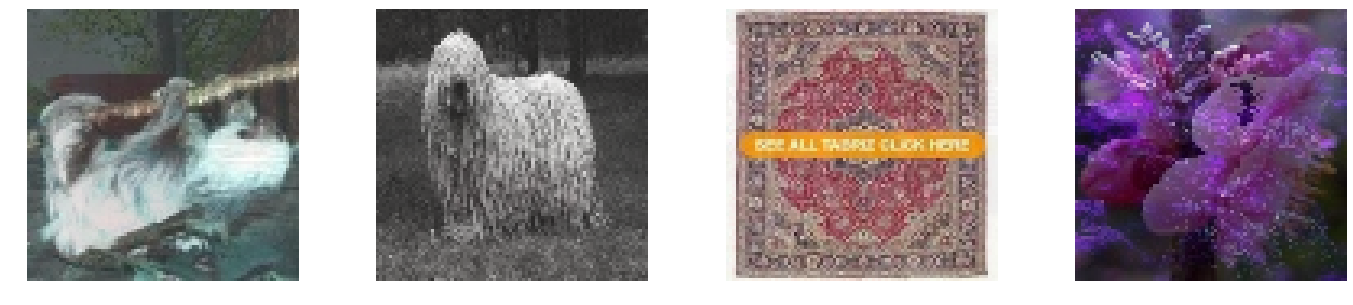

AUGMENTATION PARAMS: {'NUM_IMAGES_IN_MIXUP': 2, 'NOISY_MIXUP_PROB': 1.0}
Batch 1:
Batch specs: 4 items, item size = (84, 84, 3), dtype = float32
#0 (sample №19902): IMG [images_84x84/n0245740800000224.jpg] CLASS [n02457408]
#1 (sample №55906): IMG [images_84x84/n0761348000000225.jpg] CLASS [n07613480]
#2 (sample №7906): IMG [images_84x84/n0209183100000249.jpg] CLASS [n02091831]
#3 (sample №58470): IMG [images_84x84/n0925647900000609.jpg] CLASS [n09256479]


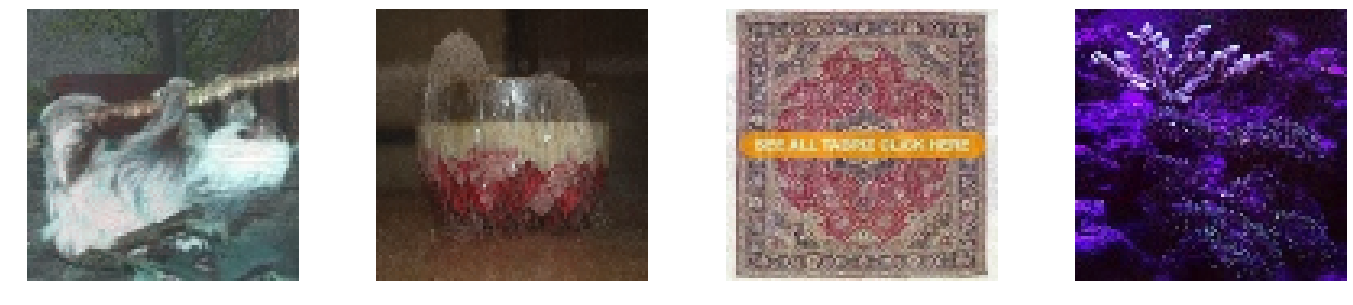

AUGMENTATION PARAMS: {'NUM_IMAGES_IN_MIXUP': 2, 'BETWEEN_CLASS_PROB': 1.0}
Batch 1:
Batch specs: 4 items, item size = (84, 84, 3), dtype = float32
#0 (sample №19902): IMG [images_84x84/n0245740800000224.jpg] CLASS [n02457408]
#1 (sample №55906): IMG [images_84x84/n0761348000000225.jpg] CLASS [n07613480]
#2 (sample №7906): IMG [images_84x84/n0209183100000249.jpg] CLASS [n02091831]
#3 (sample №58470): IMG [images_84x84/n0925647900000609.jpg] CLASS [n09256479]


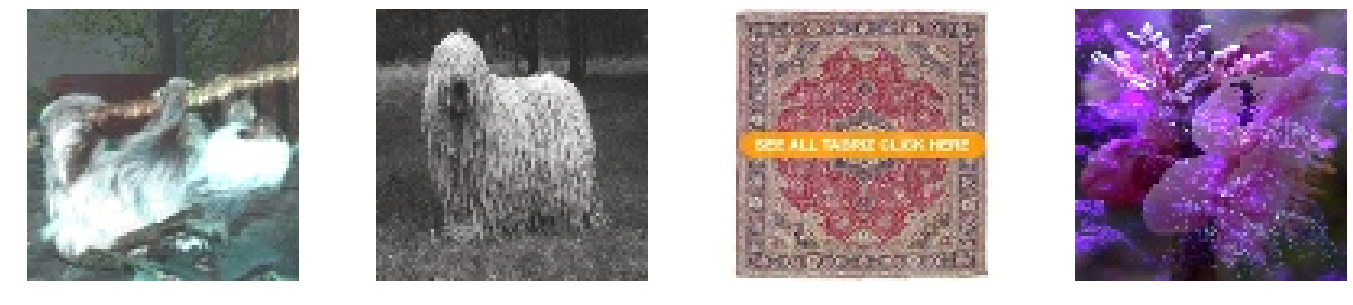

AUGMENTATION PARAMS: {'NUM_IMAGES_IN_MIXUP': 2, 'VERTICAL_CONCAT_PROB': 1.0}
Batch 1:
Batch specs: 4 items, item size = (84, 84, 3), dtype = float32
#0 (sample №19902): IMG [images_84x84/n0245740800000224.jpg] CLASS [n02457408]
#1 (sample №55906): IMG [images_84x84/n0761348000000225.jpg] CLASS [n07613480]
#2 (sample №7906): IMG [images_84x84/n0209183100000249.jpg] CLASS [n02091831]
#3 (sample №58470): IMG [images_84x84/n0925647900000609.jpg] CLASS [n09256479]


/home/anna/hse/FewShotLearning/fewshot/data_provider/transform.py:203: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (np.concatenate((inputs[0][first_slice], inputs[1][second_slice]), axis=axis), y)


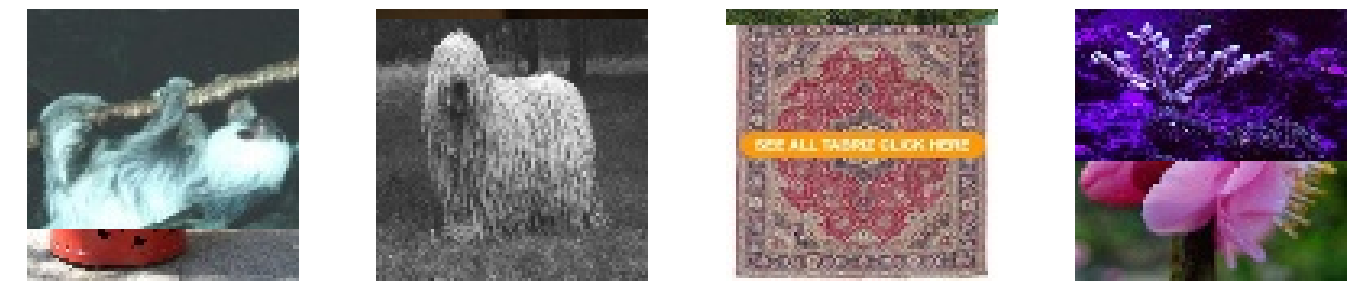

AUGMENTATION PARAMS: {'NUM_IMAGES_IN_MIXUP': 2, 'HORIZONTAL_CONCAT_PROB': 1.0}
Batch 1:
Batch specs: 4 items, item size = (84, 84, 3), dtype = float32
#0 (sample №19902): IMG [images_84x84/n0245740800000224.jpg] CLASS [n02457408]
#1 (sample №55906): IMG [images_84x84/n0761348000000225.jpg] CLASS [n07613480]
#2 (sample №7906): IMG [images_84x84/n0209183100000249.jpg] CLASS [n02091831]
#3 (sample №58470): IMG [images_84x84/n0925647900000609.jpg] CLASS [n09256479]


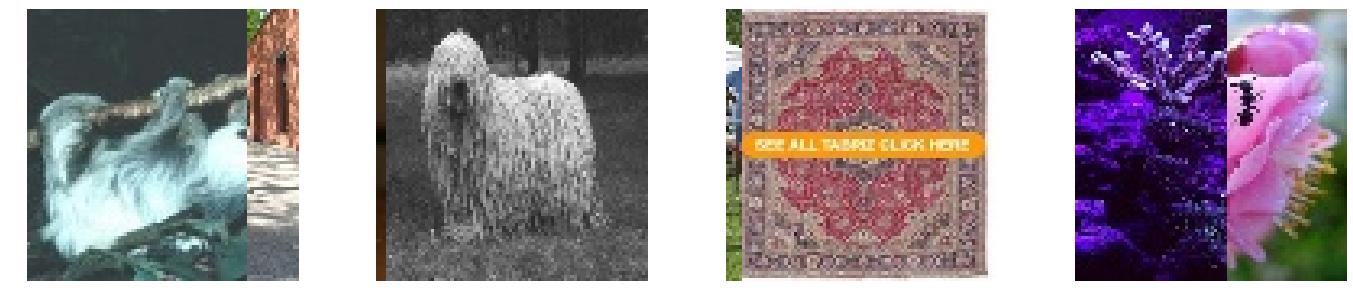

AUGMENTATION PARAMS: {'NUM_IMAGES_IN_MIXUP': 2, 'MIXED_CONCAT_PROB': 1.0}
Batch 1:
Batch specs: 4 items, item size = (84, 84, 3), dtype = float32
#0 (sample №19902): IMG [images_84x84/n0245740800000224.jpg] CLASS [n02457408]
#1 (sample №55906): IMG [images_84x84/n0761348000000225.jpg] CLASS [n07613480]
#2 (sample №7906): IMG [images_84x84/n0209183100000249.jpg] CLASS [n02091831]
#3 (sample №58470): IMG [images_84x84/n0925647900000609.jpg] CLASS [n09256479]


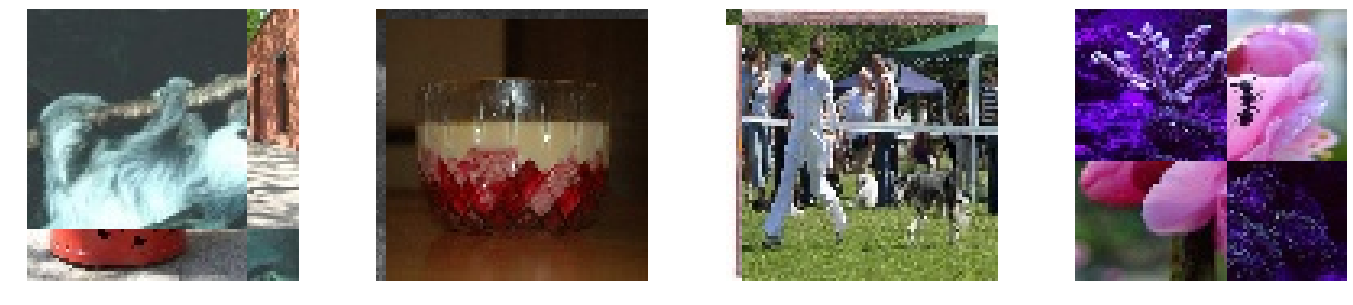

In [18]:
visualize_augmentation(num_images_in_mixup=2, mixup_prob=1.0)
visualize_augmentation(num_images_in_mixup=2, noisy_mixup_prob=1.0)
visualize_augmentation(num_images_in_mixup=2, between_class_prob=1.0)
visualize_augmentation(num_images_in_mixup=2, vertical_concat_prob=1.0)
visualize_augmentation(num_images_in_mixup=2, horizontal_concat_prob=1.0)
visualize_augmentation(num_images_in_mixup=2, mixed_concat_prob=1.0)

We can also obtain an inner one-hot representation of a target value: 

In [19]:
batch_generator = train_dataset.get_batch_generator(batch_size=4,
                                                    shuffle=True,
                                                    return_info=True)
batch_generator.get_encoding()

{'n01532829': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 'n01930112': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 'n01981276': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 'n02074367': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

## Few-shot mode

As for few-shot generator, you can additionally specify: 
* number of support samples per class $k_{shot}$ 
* maximal number of query samples per class *max_query_samples_per_class* (or opt for *None* to take them all)
* different augmentation parameters for support and query sets

In [20]:
n_way = 5

In [21]:
support_generator_args = {
    'num_images_in_mixup': 2,
    'color_jitter_prob': 1.0, 
    'value_range': (0.5, 1.5), 
    'horizontal_concat_prob': 1.0,
}

query_generator_args = {}

In [22]:
def plot_multiple_episodes(generator, num_episodes=1):
    for episode_index in range(num_episodes):
        print('Episode {}:'.format(episode_index + 1))
        support, query = next(generator)
        for sub_batch, sub_name in ((support, "support"), (query, "query")):
            print('{} set'.format(sub_name.capitalize()))
            plot_batch(*sub_batch)

Split by classes with train size = 5 (seed = 10)
Train classes: 5
Test classes: 45
Train data: 30 samples
Test data:  270 samples
Episode 1:
Support set
Batch specs: 10 items, item size = (84, 84, 3), dtype = float32
#0 (sample №270): IMG [images_84x84/n0153282900000592.jpg] CLASS [n01532829]
#1 (sample №102): IMG [images_84x84/n0153282900000215.jpg] CLASS [n01532829]
#2 (sample №11070): IMG [images_84x84/n0210855100000606.jpg] CLASS [n02108551]
#3 (sample №11235): IMG [images_84x84/n0210855100000956.jpg] CLASS [n02108551]
#4 (sample №16902): IMG [images_84x84/n0213844100000219.jpg] CLASS [n02138441]
#5 (sample №17070): IMG [images_84x84/n0213844100000585.jpg] CLASS [n02138441]
#6 (sample №38506): IMG [images_84x84/n0377350400000233.jpg] CLASS [n03773504]
#7 (sample №38670): IMG [images_84x84/n0377350400000603.jpg] CLASS [n03773504]
#8 (sample №46820): IMG [images_84x84/n0425813800000041.jpg] CLASS [n04258138]
#9 (sample №47235): IMG [images_84x84/n0425813800000942.jpg] CLASS [n0425813

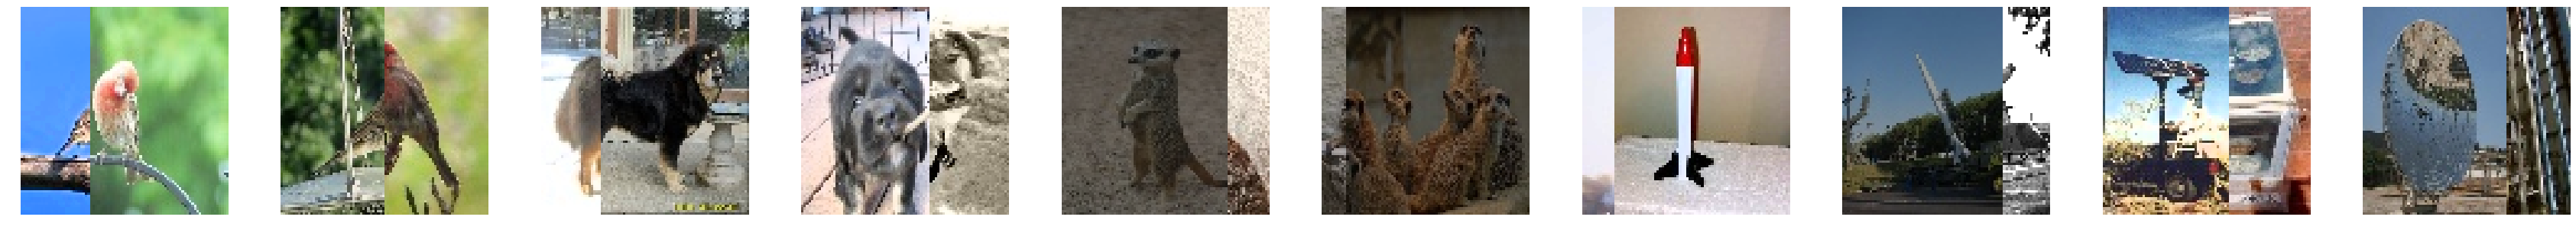

Query set
Batch specs: 5 items, item size = (84, 84, 3), dtype = float32
#0 (sample №435): IMG [images_84x84/n0153282900000957.jpg] CLASS [n01532829]
#1 (sample №10871): IMG [images_84x84/n0210855100000180.jpg] CLASS [n02108551]
#2 (sample №16906): IMG [images_84x84/n0213844100000223.jpg] CLASS [n02138441]
#3 (sample №38835): IMG [images_84x84/n0377350400000947.jpg] CLASS [n03773504]
#4 (sample №46902): IMG [images_84x84/n0425813800000234.jpg] CLASS [n04258138]


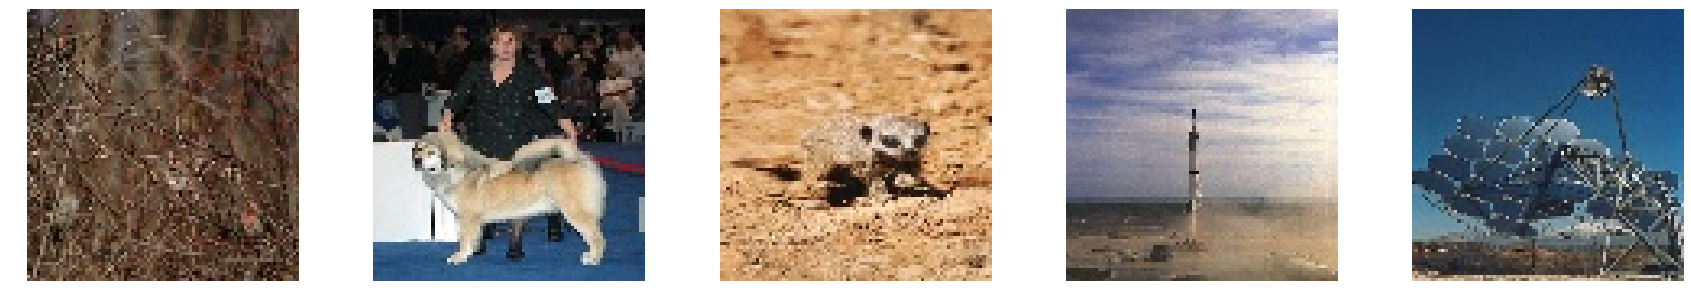

In [23]:
fewshot_dataset, _ = train_dataset.split_by_classes(train_size=n_way, random_state=10)
fewshot_generator = fewshot_dataset.get_fewshot_generator(k_shot=2,
                                                          max_query_samples_per_class=1,
                                                          support_generator_args=support_generator_args,
                                                          query_generator_args=query_generator_args,
                                                          shuffle=True,
                                                          return_info=True)

plot_multiple_episodes(fewshot_generator)

In [24]:
# what if we take only 2 samples of each class?
train_dataset, _ = dataset.split_by_objects(train_size=0.0034)

Split by objects with train size = 0.0034 (seed = 42)
Train data: 200 samples
Test data:  59800 samples


Split by classes with train size = 5 (seed = 10)
Train classes: 5
Test classes: 95
Train data: 10 samples
Test data:  190 samples
Episode 1:
Support set
Batch specs: 10 items, item size = (84, 84, 3), dtype = float32
#0 (sample №5835): IMG [images_84x84/n0198127600000945.jpg] CLASS [n01981276]
#1 (sample №5835): IMG [images_84x84/n0198127600000945.jpg] CLASS [n01981276]
#2 (sample №9435): IMG [images_84x84/n0210100600000923.jpg] CLASS [n02101006]
#3 (sample №9435): IMG [images_84x84/n0210100600000923.jpg] CLASS [n02101006]
#4 (sample №16902): IMG [images_84x84/n0213844100000219.jpg] CLASS [n02138441]
#5 (sample №16902): IMG [images_84x84/n0213844100000219.jpg] CLASS [n02138441]
#6 (sample №38502): IMG [images_84x84/n0377350400000225.jpg] CLASS [n03773504]
#7 (sample №38502): IMG [images_84x84/n0377350400000225.jpg] CLASS [n03773504]
#8 (sample №53502): IMG [images_84x84/n0460464400000234.jpg] CLASS [n04604644]
#9 (sample №53502): IMG [images_84x84/n0460464400000234.jpg] CLASS [n0460464

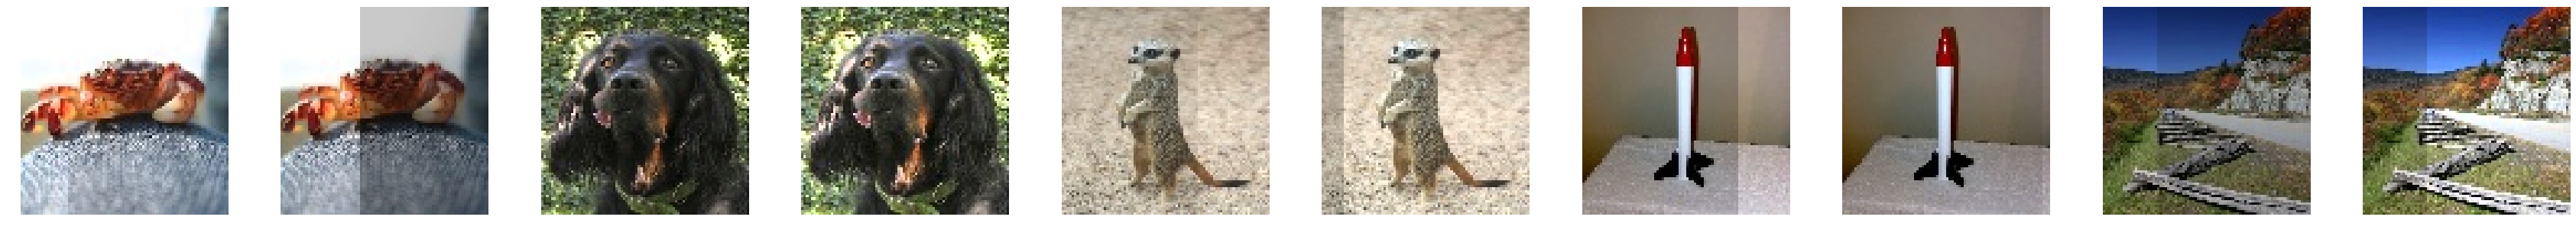

Query set
Batch specs: 5 items, item size = (84, 84, 3), dtype = float32
#0 (sample №5502): IMG [images_84x84/n0198127600000237.jpg] CLASS [n01981276]
#1 (sample №9102): IMG [images_84x84/n0210100600000207.jpg] CLASS [n02101006]
#2 (sample №17235): IMG [images_84x84/n0213844100000956.jpg] CLASS [n02138441]
#3 (sample №38835): IMG [images_84x84/n0377350400000947.jpg] CLASS [n03773504]
#4 (sample №53835): IMG [images_84x84/n0460464400000956.jpg] CLASS [n04604644]


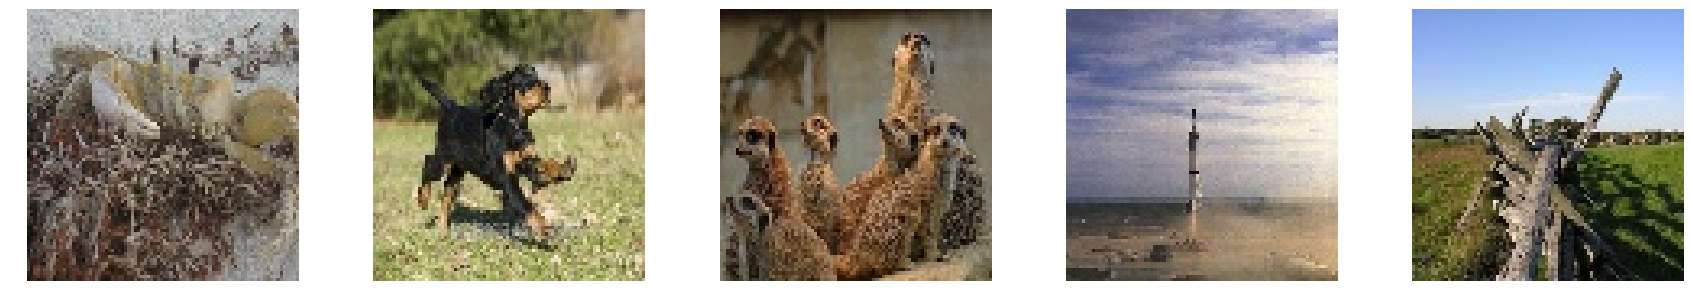

In [25]:
# if there is not enough samples, k_shot samples are sampled from batch randomly (sampling with replacement)
fewshot_dataset, _ = train_dataset.split_by_classes(train_size=n_way, random_state=10)
fewshot_generator = fewshot_dataset.get_fewshot_generator(k_shot=2,
                                                          max_query_samples_per_class=1,
                                                          support_generator_args=support_generator_args,
                                                          query_generator_args=query_generator_args,
                                                          shuffle=True,
                                                          return_info=True)

plot_multiple_episodes(fewshot_generator)